To extend our regression model to support multiple features 

In [80]:
import copy,math
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
np.set_printoptions(precision=2)

problem statement :

Size (sqft)	 Number of Bedrooms 	Number of floors	Age of Home	      Price (1000s dollars)
2104	             5	               1	                 45	                 460
1416	             3	               2	                 40	                 232
852	                 2	               1	                 35	                 178


In [81]:
x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

to show the above x matrix 

In [82]:
print(f"x shape:{x_train.shape},x type:{type(x_train)}")
print('x_train')
print(f"y shape:{y_train.shape},y type:{type(y_train)}")
print(y_train)

x shape:(3, 4),x type:<class 'numpy.ndarray'>
x_train
y shape:(3,),y type:<class 'numpy.ndarray'>
[460 232 178]


now we will set some values for w and b


In [83]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


Single prediction using vectorization

In [84]:
def predict(x,w,b):
    p=np.dot(x,w)+b
    return p

In [85]:
x_vec=x_train[0,:]
f_wb=predict(x_vec,w_init,b_init)
print(f_wb)

459.99999761940825


now compute the cost


In [86]:
def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(x[i], w) + b 
        cost = cost + (f_wb_i - y[i])**2       
    cost = cost / (2 * m)                        
    return cost



In [87]:
cost=compute_cost(x_train,y_train,w_init,b_init)
print(cost)

1.5578904880036537e-12


compute gradient with multiple variables :

In [88]:
def compute_gradient(x,y,w,b):
    m,n=x.shape
    dj_dw=np.zeros((n,))
    dj_db=0.
    for i in range(m):
        err=(np.dot(x[i],w)+b) -y[i]
        for j in range(n):
            dj_dw[j]+=err*x[i,j]
        dj_db+=err
    dj_dw/=m
    dj_db/=m
    dj_db=float(dj_db)
    return dj_db,dj_dw

In [89]:
temp_dj_dw,temp_dj_db=compute_gradient(x_train,y_train,w_init,b_init)
print(temp_dj_dw)
print(temp_dj_db)

-1.673925169143331e-06
[-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]


compute gradient descent 


In [96]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        dj_db,dj_dw = gradient_function(X, y, w, b)
        w = w - alpha * dj_dw  
        b = b - alpha * dj_db
        if i<100000:
            J_history.append( cost_function(X, y, w, b))
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history

In [97]:
initial_w = np.zeros_like(w_init)
initial_b = 0.
iterations = 1000
alpha = 5.0e-7
w_final, b_final, J_hist = gradient_descent(x_train, y_train, initial_w, initial_b,compute_cost, compute_gradient,alpha, iterations)
m,_=x_train.shape
for i in range(m):
    print(f"prediction: {np.dot(x_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost  2529.46   
Iteration  100: Cost   695.99   
Iteration  200: Cost   694.92   
Iteration  300: Cost   693.86   
Iteration  400: Cost   692.81   
Iteration  500: Cost   691.77   
Iteration  600: Cost   690.73   
Iteration  700: Cost   689.71   
Iteration  800: Cost   688.70   
Iteration  900: Cost   687.69   
prediction: 426.19, target value: 460
prediction: 286.17, target value: 232
prediction: 171.47, target value: 178


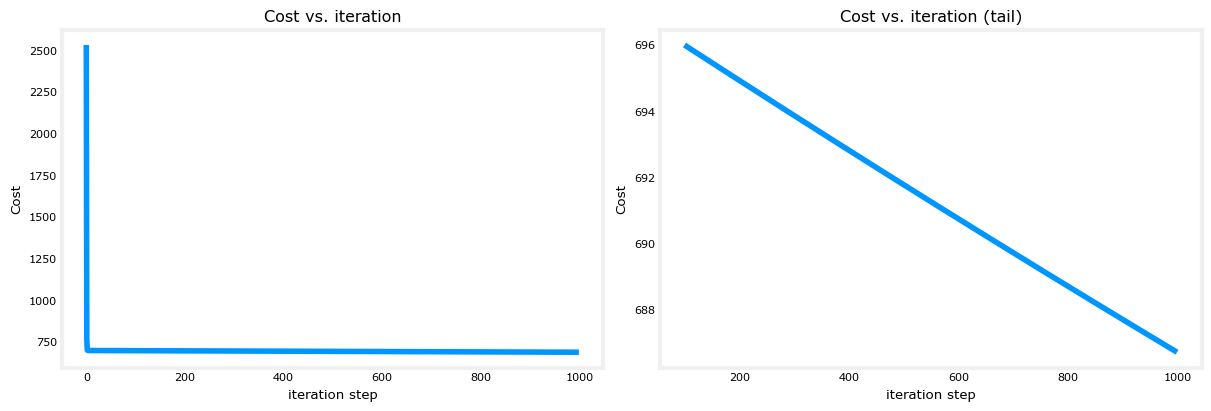

In [95]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()